In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from pyecharts.charts import Pie
from pyecharts.charts import Line

from snownlp import SnowNLP  # ÊÉÖÊÑüÂàÜÊûê

import re
import jieba
from itertools import chain  # ‰∫åÁª¥Ôºå‰∏ÄÁª¥ÂàóË°®ËΩ¨Êç¢
from collections import Counter
from wordcloud import WordCloud

In [3]:

file_path = r"/Users/pengyitong/Documents/Â§ßÊï∞ÊçÆ2102Áè≠_ÂΩ≠ÂºãÊ°ê_Âü∫‰∫éÂ∞èÁ±≥su7ËØÑËÆ∫ÁöÑÊÉÖÊÑüÂàÜÊûêÂíåÊï∞ÊçÆÂàÜÊûê/Êï∞ÊçÆ/xiaomi.csv"
df = pd.read_csv(file_path)
df

Áî®Êà∑Âêç                                                 ÂÜÖÂÆπ   ÁÇπËµûÈáè  \
0        SupremeWow                           Â∞èÁ±≥su7Âº∫ÂäøÁ†¥ÂúàÂ§™ÁÅ´ÁàÜ‰∫ÜÔºåÈõ∑ÊÄªÂæóÊäìÁ¥ßÊèêÈ´ò‰∫ßËÉΩÂïä  3025   
1               ÂèäÁ±≥‰æ†                             ÊÑüËßâËøôÊ¨°ÈªëÁ®ø‰∏çÂ§™Â§öÔºåÁúãÊù•ËΩ¶ÂúàËøòÊòØÊõ¥Âπ≤ÂáÄ‰∏Ä‰∫õÔºÅ  1725   
2           Â∞èÈ∫¶Elite                                          Â∞èÁ±≥ÊâãÊú∫1‰ª£ÂõûÂøÜÔΩû  1020   
3              Á±≥12U                          Èõ∑ÊÄªËæõËã¶‰∫Ü ÊÑüË∞¢ÊÇ®‰∏∫Â§ßÂÆ∂ÂÅö‰∫Ü‰∏ÄËæÜDream car   660   
4     Spider_boy666                                               Èõ∑ÊÄªÂä†Áîµ   650   
...             ...                                                ...   ...   
4568          Êò•Â§èÁßãÂÜ¨Êπñ                                              Ê¨¢ËøéÈõ∑ÂÜõüçâ     0   
4569          ÂõõÂ≠£ÁöÑÊöñÁ™ù  Èõ∑ÊÄªÔºåËÉΩ‰∏çËÉΩÂèëÂîÆARE U OKÂ§ßÂ≠óÊØç ËøêÂä®ÂåÖ ËÉΩ‰∏çËÉΩÂºÄMIÂÆ∂HOTELÔºåÁî®SU7Êé•ÈÄÅÂÆ¢‰∫∫Âà∞MIÂÆ∂     0   
4570          Á±≥Á≤âÁé©ËΩ¶Â±Ä  ‰∏≠ÂõΩÂπ≥ÂÆâÁöÑÂπ≥ÂÆâËΩ¶Èô©ÔºåÊú™ÁªèÊú¨‰∫∫ÂÖÅËÆ∏ÔºåÊª•Áî®Êú¨‰∫∫ÂßìÂêç„ÄÅÁîµËØù„ÄÅË∫´‰ªΩËØÅ‰ø°ÊÅØÔºåËøûÁª≠‰∏Ä‰∏™ÊúàËΩ¶Èô©ÂÆ¢ÊúçÁîµËØùÈ™öÊâ∞...     0   
4571      Êµ¶‰∏úÊú∫Âú∫‰∏äÁ©∫ÁöÑËΩ∞È∏£                                     ‰∏çÊÉ≥‰ΩìÈ™å‰Ω†‰ª¨ÁöÑÊúÄÊñ∞ÁßëÊäÄÔºåÈõ∑Âó®     0   
4572      ÈòøÁΩóÂêõÂêõ19759                                             Ê≠åÊâã2024     1   

                       Êó•Êúü  
0     2024-03-30 12:22:53  
1     2024-03-30 12:23:26  
2     2024-03-30 12:22:38  
3     2024-03-30 12:22:39  
4     2024-03-30 12:23:00  
...                   ...  
4568  2024-05-18 19:58:08  
4569  2024-05-18 19:48:31  
4570  2024-05-18 17:45:00  
4571  2024-05-18 17:42:53  
4572  2024-05-18 17:21:05  

[4573 rows x 4 columns]

In [4]:
# ËÆ°ÁÆóÊØè‰∏ÄË°å‰∏≠ÂåÖÂê´Á©∫ÂÄºÁöÑÊï∞Èáè
null_counts= df['ÂÜÖÂÆπ'].isnull().sum()
null_counts

np.int64(465)

In [5]:
# Âà†Èô§ 'ÂÜÖÂÆπ' Âàó‰∏≠ÂåÖÂê´Á©∫ÂÄºÁöÑÊâÄÊúâË°å
df = df.dropna()

# Âà†Èô§ÈáçÂ§ç
df = df.drop_duplicates()
df.shape

(3591, 4)

In [7]:
#ÂÆö‰πâÂÅúÁî®ËØçÂàóË°®
stopwords_file = '/Users/pengyitong/Documents/Â§ßÊï∞ÊçÆ2102Áè≠_ÂΩ≠ÂºãÊ°ê_Âü∫‰∫éÂ∞èÁ±≥su7ËØÑËÆ∫ÁöÑÊÉÖÊÑüÂàÜÊûêÂíåÊï∞ÊçÆÂàÜÊûê/Êï∞ÊçÆ/stopwords_cn.txt'
stopwords=[]

#ËØªÂèñÂÅúÁî®ËØçÊñá‰ª∂Âπ∂Ê∑ªÂä†Âà∞ÂÅúÁî®ËØçÂàóË°®
with open(stopwords_file,'r', encoding='utf-8') as f:
    for line in f: # ÈÅçÂéÜÊñá‰ª∂‰∏≠ÁöÑÊØè‰∏ÄË°å
        stopwords.append(line.strip())

#ÂàÜËØçÂ§ÑÁêÜÂáΩÊï∞ÔºåÂåÖÊã¨ÂéªÈô§ÂÅúÁî®ËØçÂíåÊ†áÁÇπÁ¨¶Âè∑
def tokenize(text):
    if not isinstance(text, str):
        return np.nan # ËøôË°å‰ª£Á†ÅÊ£ÄÊü•ËæìÂÖ•ÁöÑÊñáÊú¨ÊòØÂê¶ÊòØÂ≠óÁ¨¶‰∏≤Á±ªÂûã
    words = jieba.cut(text)
    filtered_words = [word for word in words if word not in stopwords and word.strip()] # ÈÇ£‰∫õ‰∏çÂú®ÂÅúÁî®ËØçÂàóË°®‰∏≠‰∏î‰∏ç‰∏∫Á©∫ÁôΩÂ≠óÁ¨¶ÁöÑËØçËØ≠Êâç‰ºöË¢´‰øùÁïô
    filtered_text = '/'.join(filtered_words) #ÂàÜËØç‰πãÈó¥Áî®ÊñúÊù†ÂàÜÈöî
    filtered_text_no_punctuation = re.sub(r'[^\w\s]','', filtered_text)
    filtered_text_no_extra_punctuation = re.sub(r'[\s+\.\!\/_,$%^*(+\"\')]+|[+‚Äî‚Äî()?„Äê„Äë‚Äú‚ÄùÔºÅÔºå„ÄÇÔºü„ÄÅ~@#Ôø•%‚Ä¶‚Ä¶&*ÔºàÔºâ„Ää„ÄãÔºö]+', '', text)
    return filtered_text_no_extra_punctuation.split('/') #ËøîÂõûÂàÜËØçÂêéÁöÑÂàóË°®ÂΩ¢ÂºèÔºåËØç‰πãÈó¥Áî®ÊñúÊù†ÂàÜÈöî
    return filtered_text


df['ÂÜÖÂÆπ'] = df['ÂÜÖÂÆπ'].apply(lambda x: str(x) if pd.notnull(x) else '')
# Ëøô‰∏ÄË°å‰ª£Á†ÅÁöÑ‰ΩúÁî®ÊòØÁ°Æ‰øùreviewÂàó‰∏≠ÁöÑÊØè‰∏™ÂÄºÈÉΩË¢´ËΩ¨Êç¢‰∏∫Â≠óÁ¨¶‰∏≤Á±ªÂûãÔºåÂπ∂Â§ÑÁêÜÂèØËÉΩÂ≠òÂú®ÁöÑÁº∫Â§±ÂÄºÔºàNaNÔºâ

# ÂØπÊØè‰∏ÄË°åÊñáÊú¨ËøõË°åÂàÜËØçÂ§ÑÁêÜÔºå‰ΩøÁî® apply ÂáΩÊï∞
df['tokenized_text'] = df['ÂÜÖÂÆπ'].apply(tokenize)

df.head()

Áî®Êà∑Âêç                         ÂÜÖÂÆπ   ÁÇπËµûÈáè                   Êó•Êúü  \
0     SupremeWow   Â∞èÁ±≥su7Âº∫ÂäøÁ†¥ÂúàÂ§™ÁÅ´ÁàÜ‰∫ÜÔºåÈõ∑ÊÄªÂæóÊäìÁ¥ßÊèêÈ´ò‰∫ßËÉΩÂïä  3025  2024-03-30 12:22:53   
1            ÂèäÁ±≥‰æ†     ÊÑüËßâËøôÊ¨°ÈªëÁ®ø‰∏çÂ§™Â§öÔºåÁúãÊù•ËΩ¶ÂúàËøòÊòØÊõ¥Âπ≤ÂáÄ‰∏Ä‰∫õÔºÅ  1725  2024-03-30 12:23:26   
2        Â∞èÈ∫¶Elite                  Â∞èÁ±≥ÊâãÊú∫1‰ª£ÂõûÂøÜÔΩû  1020  2024-03-30 12:22:38   
3           Á±≥12U  Èõ∑ÊÄªËæõËã¶‰∫Ü ÊÑüË∞¢ÊÇ®‰∏∫Â§ßÂÆ∂ÂÅö‰∫Ü‰∏ÄËæÜDream car   660  2024-03-30 12:22:39   
4  Spider_boy666                       Èõ∑ÊÄªÂä†Áîµ   650  2024-03-30 12:23:00   

              tokenized_text  
0  [Â∞èÁ±≥su7Âº∫ÂäøÁ†¥ÂúàÂ§™ÁÅ´ÁàÜ‰∫ÜÈõ∑ÊÄªÂæóÊäìÁ¥ßÊèêÈ´ò‰∫ßËÉΩÂïä]  
1     [ÊÑüËßâËøôÊ¨°ÈªëÁ®ø‰∏çÂ§™Â§öÁúãÊù•ËΩ¶ÂúàËøòÊòØÊõ¥Âπ≤ÂáÄ‰∏Ä‰∫õ]  
2                [Â∞èÁ±≥ÊâãÊú∫1‰ª£ÂõûÂøÜÔΩû]  
3  [Èõ∑ÊÄªËæõËã¶‰∫ÜÊÑüË∞¢ÊÇ®‰∏∫Â§ßÂÆ∂ÂÅö‰∫Ü‰∏ÄËæÜDreamcar]  
4                     [Èõ∑ÊÄªÂä†Áîµ]

In [8]:
# ÂØπÊØèÊù°ËØÑËÆ∫ËøõË°åÂàÜÊûê
df['tokenized_text'] = df['tokenized_text'].astype(str)

df['word'] = df['tokenized_text'].map(lambda c: ' '.join(jieba.cut(c)))
df.head()

Áî®Êà∑Âêç                         ÂÜÖÂÆπ   ÁÇπËµûÈáè                   Êó•Êúü  \
0     SupremeWow   Â∞èÁ±≥su7Âº∫ÂäøÁ†¥ÂúàÂ§™ÁÅ´ÁàÜ‰∫ÜÔºåÈõ∑ÊÄªÂæóÊäìÁ¥ßÊèêÈ´ò‰∫ßËÉΩÂïä  3025  2024-03-30 12:22:53   
1            ÂèäÁ±≥‰æ†     ÊÑüËßâËøôÊ¨°ÈªëÁ®ø‰∏çÂ§™Â§öÔºåÁúãÊù•ËΩ¶ÂúàËøòÊòØÊõ¥Âπ≤ÂáÄ‰∏Ä‰∫õÔºÅ  1725  2024-03-30 12:23:26   
2        Â∞èÈ∫¶Elite                  Â∞èÁ±≥ÊâãÊú∫1‰ª£ÂõûÂøÜÔΩû  1020  2024-03-30 12:22:38   
3           Á±≥12U  Èõ∑ÊÄªËæõËã¶‰∫Ü ÊÑüË∞¢ÊÇ®‰∏∫Â§ßÂÆ∂ÂÅö‰∫Ü‰∏ÄËæÜDream car   660  2024-03-30 12:22:39   
4  Spider_boy666                       Èõ∑ÊÄªÂä†Áîµ   650  2024-03-30 12:23:00   

                tokenized_text                                         word  
0  ['Â∞èÁ±≥su7Âº∫ÂäøÁ†¥ÂúàÂ§™ÁÅ´ÁàÜ‰∫ÜÈõ∑ÊÄªÂæóÊäìÁ¥ßÊèêÈ´ò‰∫ßËÉΩÂïä']  [ ' Â∞èÁ±≥ su7 Âº∫Âäø Á†¥Âúà Â§™ ÁÅ´ÁàÜ ‰∫Ü Èõ∑ ÊÄªÂæó ÊäìÁ¥ß ÊèêÈ´ò ‰∫ßËÉΩ Âïä ' ]  
1     ['ÊÑüËßâËøôÊ¨°ÈªëÁ®ø‰∏çÂ§™Â§öÁúãÊù•ËΩ¶ÂúàËøòÊòØÊõ¥Âπ≤ÂáÄ‰∏Ä‰∫õ']        [ ' ÊÑüËßâ ËøôÊ¨° ÈªëÁ®ø ‰∏çÂ§™Â§ö ÁúãÊù• ËΩ¶Âúà ËøòÊòØ Êõ¥ Âπ≤ÂáÄ ‰∏Ä‰∫õ ' ]  
2                ['Â∞èÁ±≥ÊâãÊú∫1‰ª£ÂõûÂøÜÔΩû']                       [ ' Â∞èÁ±≥ ÊâãÊú∫ 1 ‰ª£ ÂõûÂøÜ ÔΩû ' ]  
3  ['Èõ∑ÊÄªËæõËã¶‰∫ÜÊÑüË∞¢ÊÇ®‰∏∫Â§ßÂÆ∂ÂÅö‰∫Ü‰∏ÄËæÜDreamcar']     [ ' Èõ∑ÊÄª ËæõËã¶ ‰∫Ü ÊÑüË∞¢ÊÇ® ‰∏∫ Â§ßÂÆ∂ ÂÅö ‰∫Ü ‰∏ÄËæÜ Dreamcar ' ]  
4                     ['Èõ∑ÊÄªÂä†Áîµ']                                [ ' Èõ∑ÊÄªÂä† Áîµ ' ]

In [9]:

# 1).ÂàÜËØçÂ§ÑÁêÜ
def cut_word(text):
    return jieba.cut(text)

df['Word'] = df['word'].apply(cut_word)
df.sample(5)

Áî®Êà∑Âêç                                                 ÂÜÖÂÆπ  ÁÇπËµûÈáè  \
86          Êè≠Èò≥Â§ßÈõ®                                               Ê≥∞Ë£§Ëæ£ÔºÅ    1   
2207  ËøôÊòØÁ©∫ÁôΩÁúã‰∏çÂà∞Áúã‰∏çÂà∞  ÂØπ‰∫éÊô∫ËÉΩÈó®ÈîÅÊúâ‰∏™ÊÉ≥Ê≥ïÔºåÁé∞Âú®Êô∫ËÉΩÈó®ÈîÅÈò≤Áå´ÁúºËÆæËÆ°‰∏çÂêàÁêÜÔºåË¶Å‰πàÈúÄË¶ÅÊåâÈíÆÔºå‰ΩÜÂÆπÊòìÂ§±ÁÅµÔºåË¶Å‰πàÈúÄË¶ÅÊóãËΩ¨Êåâ...    0   
565         ÊºÇÂú®Êù≠Âüé                                               ÊåÅÁª≠ÁÅ´ÁàÜ    0   
2516    imceciim                                     Èõ∑ÊÄª Âπø‰∏úÂú∞Âå∫ÈúÄË¶ÅÂ∞èÁ±≥ÁîµÂä®ËΩ¶    1   
1823        Âõ¢Âã§Ê±ÇÂàõ            Èõ∑ÊÄªÔºåËÉΩ‰∏çËÉΩËÅîÂêà‰ºòÁßÄËΩ¶Ë°£ÂïÜÔºåÂá∫‰∏Ä‰∏™Su7ÂÆöÂà∂ÁâàÁöÑÈöêÂΩ¢ËΩ¶Ë°£ÂëÄÔºåËøôÊ†∑Â∞±‰∏ç‰ºö‰π±Ë¥¥‰∫Ü„ÄÇ    0   

                       Êó•Êúü                                     tokenized_text  \
86    2024-03-30 13:13:46                                            ['Ê≥∞Ë£§Ëæ£']   
2207  2024-04-13 16:34:01  ['ÂØπ‰∫éÊô∫ËÉΩÈó®ÈîÅÊúâ‰∏™ÊÉ≥Ê≥ïÁé∞Âú®Êô∫ËÉΩÈó®ÈîÅÈò≤Áå´ÁúºËÆæËÆ°‰∏çÂêàÁêÜË¶Å‰πàÈúÄË¶ÅÊåâÈíÆ‰ΩÜÂÆπÊòìÂ§±ÁÅµË¶Å‰πàÈúÄË¶ÅÊóãËΩ¨ÊåâÈíÆÊâì...   
565   2024-05-21 11:31:00                                           ['ÊåÅÁª≠ÁÅ´ÁàÜ']   
2516  2024-04-10 15:40:13                                  ['Èõ∑ÊÄªÂπø‰∏úÂú∞Âå∫ÈúÄË¶ÅÂ∞èÁ±≥ÁîµÂä®ËΩ¶']   
1823  2024-04-19 09:38:38            ['Èõ∑ÊÄªËÉΩ‰∏çËÉΩËÅîÂêà‰ºòÁßÄËΩ¶Ë°£ÂïÜÂá∫‰∏Ä‰∏™Su7ÂÆöÂà∂ÁâàÁöÑÈöêÂΩ¢ËΩ¶Ë°£ÂëÄËøôÊ†∑Â∞±‰∏ç‰ºö‰π±Ë¥¥‰∫Ü']   

                                                   word  \
86                                         [ ' Ê≥∞Ë£§ Ëæ£ ' ]   
2207  [ ' ÂØπ‰∫é Êô∫ËÉΩ Èó®ÈîÅ Êúâ‰∏™ ÊÉ≥Ê≥ï Áé∞Âú® Êô∫ËÉΩ Èó®ÈîÅ Èò≤ Áå´Áúº ËÆæËÆ° ‰∏çÂêàÁêÜ Ë¶Å‰πà ÈúÄË¶Å ...   
565                                       [ ' ÊåÅÁª≠ ÁÅ´ÁàÜ ' ]   
2516                          [ ' Èõ∑ÊÄª Âπø‰∏úÂú∞Âå∫ ÈúÄË¶Å Â∞èÁ±≥ ÁîµÂä®ËΩ¶ ' ]   
1823  [ ' Èõ∑ ÊÄªËÉΩ ‰∏çËÉΩ ËÅîÂêà ‰ºòÁßÄ ËΩ¶ Ë°£ÂïÜ Âá∫ ‰∏Ä‰∏™ Su7 ÂÆöÂà∂ Áâà ÁöÑ ÈöêÂΩ¢ ËΩ¶Ë°£ ÂëÄ...   

                                                 Word  
86    <generator object Tokenizer.cut at 0x32b2ac1a0>  
2207  <generator object Tokenizer.cut at 0x32b35aae0>  
565   <generator object Tokenizer.cut at 0x32b2e0880>  
2516  <generator object Tokenizer.cut at 0x32b371d20>  
1823  <generator object Tokenizer.cut at 0x32b33dfe0>

In [10]:
df['Word']

0       <generator object Tokenizer.cut at 0x328eaa820>
1       <generator object Tokenizer.cut at 0x32b268f60>
2       <generator object Tokenizer.cut at 0x32b2690c0>
3       <generator object Tokenizer.cut at 0x32b269220>
4       <generator object Tokenizer.cut at 0x32b269380>
                             ...                       
4180    <generator object Tokenizer.cut at 0x32b3ecb40>
4182    <generator object Tokenizer.cut at 0x32b3ecca0>
4183    <generator object Tokenizer.cut at 0x32b3ece00>
4185    <generator object Tokenizer.cut at 0x32b3ecf60>
4187    <generator object Tokenizer.cut at 0x32b3ed0c0>
Name: Word, Length: 3591, dtype: object

In [12]:
# 2).Âà†Èô§ÂÅúÁî®ËØç 

def get_stopword():
    s = set()
    with open(r"/Users/pengyitong/Documents/Â§ßÊï∞ÊçÆ2102Áè≠_ÂΩ≠ÂºãÊ°ê_Âü∫‰∫éÂ∞èÁ±≥su7ËØÑËÆ∫ÁöÑÊÉÖÊÑüÂàÜÊûêÂíåÊï∞ÊçÆÂàÜÊûê/Êï∞ÊçÆ/stopwords_cn.txt", encoding="UTF-8") as f:
        for line in f:
            s.add(line.strip())
    return s

stopword = get_stopword()

def remove_stopword(words):
    return [word for word in words if word not in stopword]

df['Word'] = df['Word'].apply(remove_stopword)




df.head()

Áî®Êà∑Âêç                         ÂÜÖÂÆπ   ÁÇπËµûÈáè                   Êó•Êúü  \
0     SupremeWow   Â∞èÁ±≥su7Âº∫ÂäøÁ†¥ÂúàÂ§™ÁÅ´ÁàÜ‰∫ÜÔºåÈõ∑ÊÄªÂæóÊäìÁ¥ßÊèêÈ´ò‰∫ßËÉΩÂïä  3025  2024-03-30 12:22:53   
1            ÂèäÁ±≥‰æ†     ÊÑüËßâËøôÊ¨°ÈªëÁ®ø‰∏çÂ§™Â§öÔºåÁúãÊù•ËΩ¶ÂúàËøòÊòØÊõ¥Âπ≤ÂáÄ‰∏Ä‰∫õÔºÅ  1725  2024-03-30 12:23:26   
2        Â∞èÈ∫¶Elite                  Â∞èÁ±≥ÊâãÊú∫1‰ª£ÂõûÂøÜÔΩû  1020  2024-03-30 12:22:38   
3           Á±≥12U  Èõ∑ÊÄªËæõËã¶‰∫Ü ÊÑüË∞¢ÊÇ®‰∏∫Â§ßÂÆ∂ÂÅö‰∫Ü‰∏ÄËæÜDream car   660  2024-03-30 12:22:39   
4  Spider_boy666                       Èõ∑ÊÄªÂä†Áîµ   650  2024-03-30 12:23:00   

                tokenized_text                                         word  \
0  ['Â∞èÁ±≥su7Âº∫ÂäøÁ†¥ÂúàÂ§™ÁÅ´ÁàÜ‰∫ÜÈõ∑ÊÄªÂæóÊäìÁ¥ßÊèêÈ´ò‰∫ßËÉΩÂïä']  [ ' Â∞èÁ±≥ su7 Âº∫Âäø Á†¥Âúà Â§™ ÁÅ´ÁàÜ ‰∫Ü Èõ∑ ÊÄªÂæó ÊäìÁ¥ß ÊèêÈ´ò ‰∫ßËÉΩ Âïä ' ]   
1     ['ÊÑüËßâËøôÊ¨°ÈªëÁ®ø‰∏çÂ§™Â§öÁúãÊù•ËΩ¶ÂúàËøòÊòØÊõ¥Âπ≤ÂáÄ‰∏Ä‰∫õ']        [ ' ÊÑüËßâ ËøôÊ¨° ÈªëÁ®ø ‰∏çÂ§™Â§ö ÁúãÊù• ËΩ¶Âúà ËøòÊòØ Êõ¥ Âπ≤ÂáÄ ‰∏Ä‰∫õ ' ]   
2                ['Â∞èÁ±≥ÊâãÊú∫1‰ª£ÂõûÂøÜÔΩû']                       [ ' Â∞èÁ±≥ ÊâãÊú∫ 1 ‰ª£ ÂõûÂøÜ ÔΩû ' ]   
3  ['Èõ∑ÊÄªËæõËã¶‰∫ÜÊÑüË∞¢ÊÇ®‰∏∫Â§ßÂÆ∂ÂÅö‰∫Ü‰∏ÄËæÜDreamcar']     [ ' Èõ∑ÊÄª ËæõËã¶ ‰∫Ü ÊÑüË∞¢ÊÇ® ‰∏∫ Â§ßÂÆ∂ ÂÅö ‰∫Ü ‰∏ÄËæÜ Dreamcar ' ]   
4                     ['Èõ∑ÊÄªÂä†Áîµ']                                [ ' Èõ∑ÊÄªÂä† Áîµ ' ]   

                                                Word  
0  [[,  , ',  , Â∞èÁ±≥,  , su7,  , Âº∫Âäø,  , Á†¥Âúà,  ,  , ÁÅ´...  
1  [[,  , ',  , ÊÑüËßâ,  , ËøôÊ¨°,  , ÈªëÁ®ø,  , ‰∏çÂ§™Â§ö,  , ÁúãÊù•, ...  
2  [[,  , ',  , Â∞èÁ±≥,  , ÊâãÊú∫,  , 1,  , ‰ª£,  , ÂõûÂøÜ,  , ...  
3  [[,  , ',  , Èõ∑ÊÄª,  , ËæõËã¶,  ,  , ÊÑüË∞¢ÊÇ®,  ,  ,  , ÂÅö,...  
4                [[,  , ',  , Èõ∑ÊÄªÂä†,  , Áîµ,  , ',  , ]]

In [13]:
# list_2d = df['word'].tolist()

list_2d = df['Word'].tolist()
list_1d = list(chain.from_iterable(list_2d))
# ÊòØ‰∏Ä‰∏™‰∫åÁª¥ÂàóË°® (2D list)ÔºåÂÖ∂ÊØè‰∏™ÂÖÉÁ¥†ÈÉΩÊòØ‰∏Ä‰∏™ÂàóË°®

In [14]:
list_1d

['[',
 ' ',
 "'",
 ' ',
 'Â∞èÁ±≥',
 ' ',
 'su7',
 ' ',
 'Âº∫Âäø',
 ' ',
 'Á†¥Âúà',
 ' ',
 ' ',
 'ÁÅ´ÁàÜ',
 ' ',
 ' ',
 'Èõ∑',
 ' ',
 'ÊÄªÂæó',
 ' ',
 'ÊäìÁ¥ß',
 ' ',
 'ÊèêÈ´ò',
 ' ',
 '‰∫ßËÉΩ',
 ' ',
 ' ',
 "'",
 ' ',
 ']',
 '[',
 ' ',
 "'",
 ' ',
 'ÊÑüËßâ',
 ' ',
 'ËøôÊ¨°',
 ' ',
 'ÈªëÁ®ø',
 ' ',
 '‰∏çÂ§™Â§ö',
 ' ',
 'ÁúãÊù•',
 ' ',
 'ËΩ¶Âúà',
 ' ',
 ' ',
 'Êõ¥',
 ' ',
 'Âπ≤ÂáÄ',
 ' ',
 ' ',
 "'",
 ' ',
 ']',
 '[',
 ' ',
 "'",
 ' ',
 'Â∞èÁ±≥',
 ' ',
 'ÊâãÊú∫',
 ' ',
 '1',
 ' ',
 '‰ª£',
 ' ',
 'ÂõûÂøÜ',
 ' ',
 'ÔΩû',
 ' ',
 "'",
 ' ',
 ']',
 '[',
 ' ',
 "'",
 ' ',
 'Èõ∑ÊÄª',
 ' ',
 'ËæõËã¶',
 ' ',
 ' ',
 'ÊÑüË∞¢ÊÇ®',
 ' ',
 ' ',
 ' ',
 'ÂÅö',
 ' ',
 ' ',
 '‰∏ÄËæÜ',
 ' ',
 'Dreamcar',
 ' ',
 "'",
 ' ',
 ']',
 '[',
 ' ',
 "'",
 ' ',
 'Èõ∑ÊÄªÂä†',
 ' ',
 'Áîµ',
 ' ',
 "'",
 ' ',
 ']',
 '[',
 ' ',
 "'",
 ' ',
 ' ',
 '‰ªäÂ§©',
 ' ',
 ' ',
 ' ',
 ' ',
 'Êó©‰∏ä',
 ' ',
 'Èõ∑ÊÄª',
 ' ',
 ' ',
 'ÂèëÂ∏É‰ºö',
 ' ',
 'Â∞§ÂÖ∂',
 ' ',
 ' ',
 'Ê±ΩËΩ¶',
 ' ',
 'ÂèëÂ∏É‰ºö',
 ' ',
 'ÊúÄÂêé',
 ' ',
 ' ',

In [15]:
df['word']


0       [ ' Â∞èÁ±≥ su7 Âº∫Âäø Á†¥Âúà Â§™ ÁÅ´ÁàÜ ‰∫Ü Èõ∑ ÊÄªÂæó ÊäìÁ¥ß ÊèêÈ´ò ‰∫ßËÉΩ Âïä ' ]
1             [ ' ÊÑüËßâ ËøôÊ¨° ÈªëÁ®ø ‰∏çÂ§™Â§ö ÁúãÊù• ËΩ¶Âúà ËøòÊòØ Êõ¥ Âπ≤ÂáÄ ‰∏Ä‰∫õ ' ]
2                            [ ' Â∞èÁ±≥ ÊâãÊú∫ 1 ‰ª£ ÂõûÂøÜ ÔΩû ' ]
3          [ ' Èõ∑ÊÄª ËæõËã¶ ‰∫Ü ÊÑüË∞¢ÊÇ® ‰∏∫ Â§ßÂÆ∂ ÂÅö ‰∫Ü ‰∏ÄËæÜ Dreamcar ' ]
4                                     [ ' Èõ∑ÊÄªÂä† Áîµ ' ]
                           ...                     
4180                            [ ' Á∫¢Á±≥ Ëøò Âá∫ Ê±ΩËΩ¶ Âêó ' ]
4182                        [ ' Â∞èÁ±≥ fold3 ‰∏∫Âï• ÈÄ† ÁöÑ ' ]
4183                                    [ ' suv ' ]
4185                            [ ' Êù• ‰∫Ü Êù• ‰∫Ü Èõ∑ ÊÄª ' ]
4187                                     [ ' Á¨¨‰∏Ä ' ]
Name: word, Length: 3591, dtype: object

/var/folders/ln/vtlcjcd5303gxd313xg81ygw0000gn/T/ipykernel_30149/2272467999.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(d.keys()),y=list(d.values()), palette="Set2")


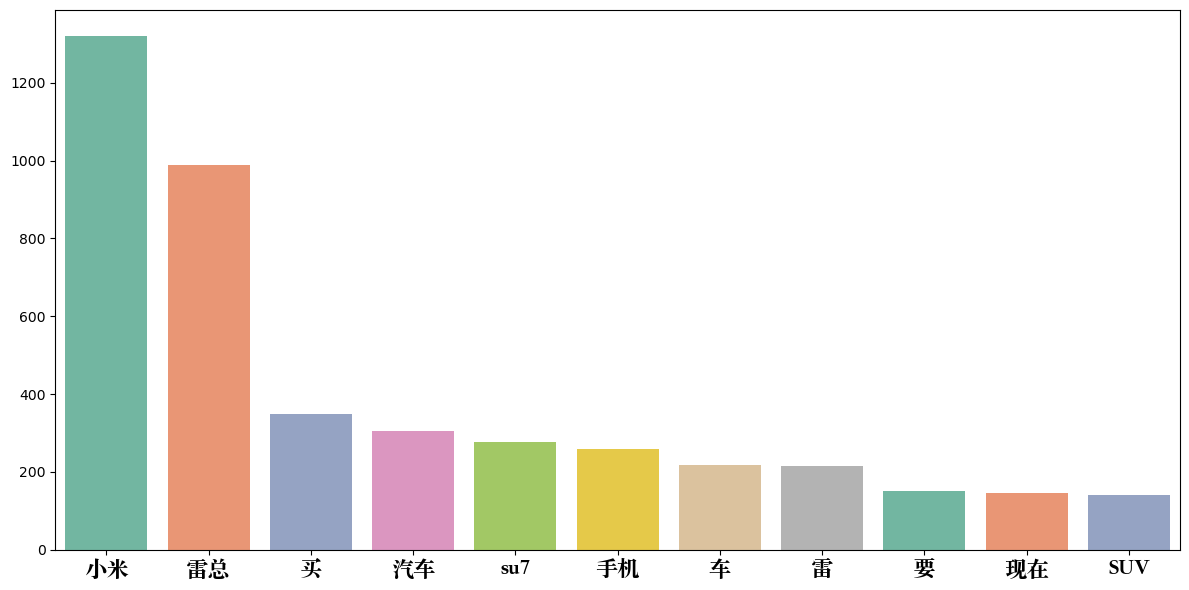

In [22]:
# ËØçÈ¢ëÂèØËßÜÂåñ  top15
c = Counter(list_1d)
common = c.most_common(15)

# ÁßªÈô§ÂâçÂõõ‰∏™ÊúÄÂ∏∏ËßÅÁöÑÁªìÊûú
filtered_common = common[4:]

# Â∞ÜËØçÈ¢ëÁªìÊûúËΩ¨Êç¢‰∏∫Â≠óÂÖ∏
d = dict(filtered_common)
# d = dict(common)

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
myfont = FontProperties(fname='/System/Library/Fonts/Supplemental/Songti.ttc', size=16)

plt.figure(figsize=(12,6))
sns.barplot(x=list(d.keys()),y=list(d.values()), palette="Set2")
plt.xticks(fontproperties=myfont)

# ‰øùÂ≠òÂõæË°®
output_path = r'/Users/pengyitong/Documents/Â§ßÊï∞ÊçÆ2102Áè≠_ÂΩ≠ÂºãÊ°ê_Âü∫‰∫éÂ∞èÁ±≥su7ËØÑËÆ∫ÁöÑÊÉÖÊÑüÂàÜÊûêÂíåÊï∞ÊçÆÂàÜÊûê/ÂèØËßÜÂåñ/MACÊµãËØïËØçÈ¢ëÂèØËßÜÂåñ.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

In [23]:
 list(d.values())

[1321, 989, 348, 306, 278, 258, 217, 214, 151, 145, 140]

/var/folders/ln/vtlcjcd5303gxd313xg81ygw0000gn/T/ipykernel_30149/3755576971.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(d.keys()), y=percentage, palette="Set3")


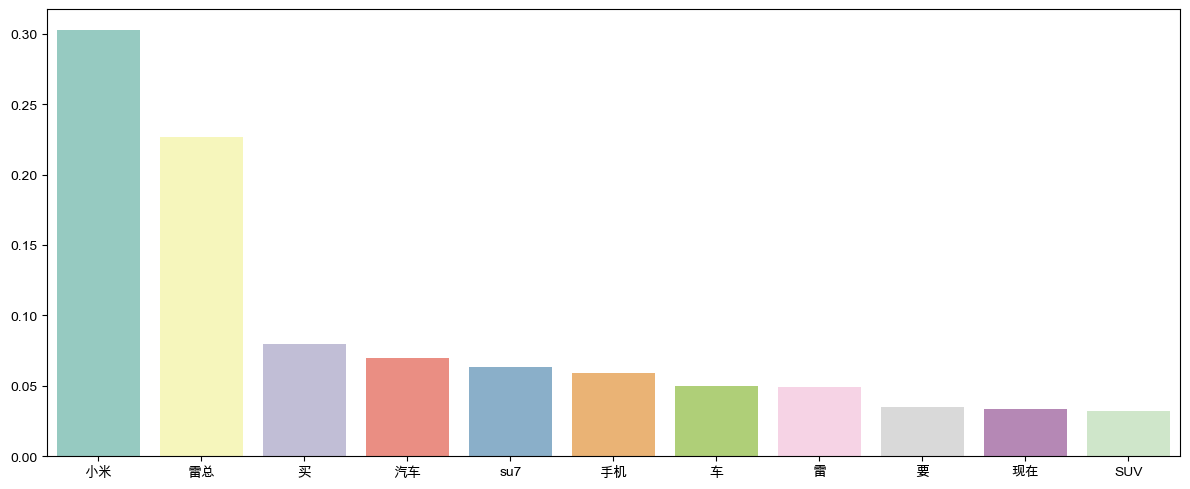

In [26]:
# ËØçÈ¢ëÂç†ÊØî top15
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] 
total = sum(d.values()) 
percentage = [v/ total for v in d.values()]
# print([f"{v:.2f}%" for v in percentage])
plt.figure(figsize=(12, 5))
sns.barplot(x=list(d.keys()), y=percentage, palette="Set3")

# ‰øùÂ≠òÂõæË°®
output_path = r'/Users/pengyitong/Documents/Â§ßÊï∞ÊçÆ2102Áè≠_ÂΩ≠ÂºãÊ°ê_Âü∫‰∫éÂ∞èÁ±≥su7ËØÑËÆ∫ÁöÑÊÉÖÊÑüÂàÜÊûêÂíåÊï∞ÊçÆÂàÜÊûê/ÂèØËßÜÂåñ/MACÊµãËØïËØçÈ¢ëÂç†ÊØî.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

/var/folders/ln/vtlcjcd5303gxd313xg81ygw0000gn/T/ipykernel_30149/1724843775.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counter.keys()), y=list(counter.values()), palette="Set2")


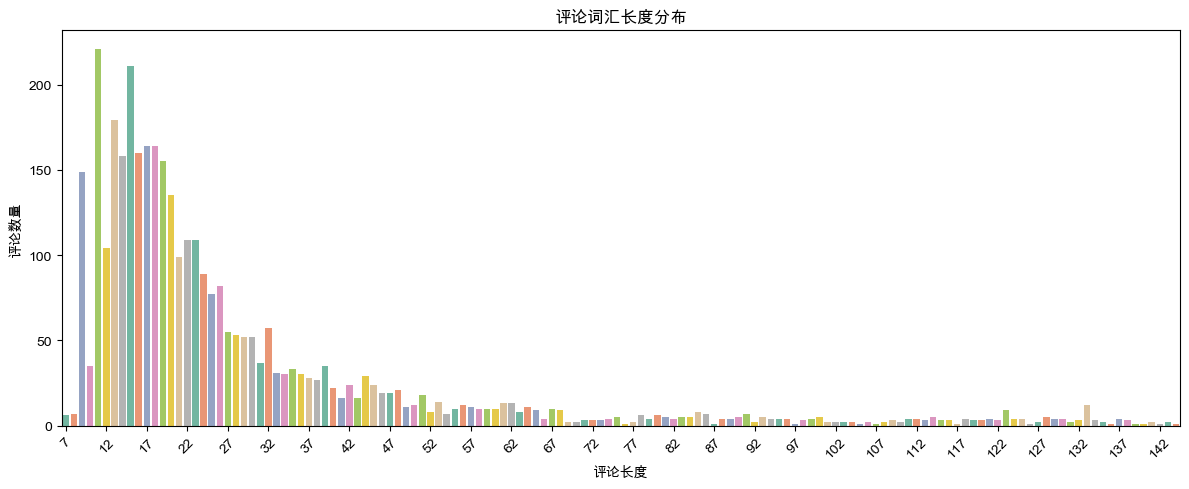

In [34]:
from collections import Counter

num = [len(li) for li in list_2d]
counter = Counter(num)
length = len(num)

plt.figure(figsize=(12, 5))
sns.barplot(x=list(counter.keys()), y=list(counter.values()), palette="Set2")

plt.xlabel("ËØÑËÆ∫ÈïøÂ∫¶")
plt.ylabel("ËØÑËÆ∫Êï∞Èáè")
plt.title("ËØÑËÆ∫ËØçÊ±áÈïøÂ∫¶ÂàÜÂ∏É")

plt.xticks(ticks=plt.xticks()[0][::5], rotation=45)  # ÊØèÈöî 5 ‰∏™ÂàªÂ∫¶ÊòæÁ§∫‰∏ÄÊ¨°
# plt.xticks() ÂçïÁã¨Áî®ÁöÑÊó∂ÂÄôÔºåÂÖ∂ÂÆûËøîÂõûÁöÑÊòØ‰∏Ä‰∏™ ÂÖÉÁªÑÔºö(array([...]), [Text(...), Text(...), ...])

# ‰øùÂ≠òÂõæË°®
output_path = r'/Users/pengyitong/Documents/Â§ßÊï∞ÊçÆ2102Áè≠_ÂΩ≠ÂºãÊ°ê_Âü∫‰∫éÂ∞èÁ±≥su7ËØÑËÆ∫ÁöÑÊÉÖÊÑüÂàÜÊûêÂíåÊï∞ÊçÆÂàÜÊûê/ÂèØËßÜÂåñ/MACÊµãËØïËØÑËÆ∫ÈïøÂ∫¶.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

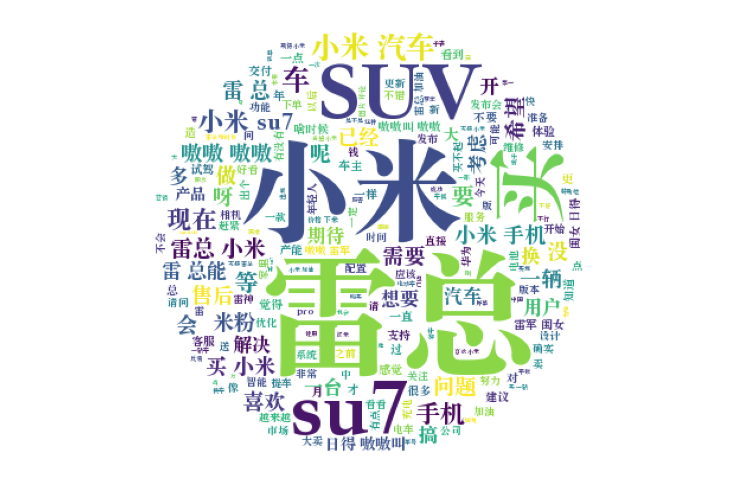

In [38]:
wc = WordCloud(font_path=r"/System/Library/Fonts/Supplemental/Songti.ttc",
               mask=plt.imread(r'ÂúÜ.jpg'),
               background_color='white')

# wordcloudË¶ÅÊ±Ç‰º†ÈÄíÁöÑËØçÊ±áÊòØÁî®Á©∫Ê†ºÂàÜÂºÄÁöÑÂ≠óÁ¨¶‰∏≤
join_words = ' '.join(list_1d)
img = wc.generate(join_words)
plt.figure(figsize=(12, 6))
plt.imshow(img)
plt.axis('off')
wc.to_file(r"/Users/pengyitong/Documents/Â§ßÊï∞ÊçÆ2102Áè≠_ÂΩ≠ÂºãÊ°ê_Âü∫‰∫éÂ∞èÁ±≥su7ËØÑËÆ∫ÁöÑÊÉÖÊÑüÂàÜÊûêÂíåÊï∞ÊçÆÂàÜÊûê/ÂèØËßÜÂåñ/MACÊµãËØïÂ∞èÁ±≥ËØÑËÆ∫ËØç‰∫ë.png")
plt.show()